# Main Assignment Conditions

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

### Interconnect's services

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, *digital subscriber line*) or through a fiber optic cable.

Some other services the company provides include:

- Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

### Data Description

The data consists of files obtained from different sources:

- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

# Importing Libraries

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Exploring the Data

In [2]:
def get_precent_of_nans(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls %'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    df_nulls = df_nulls.sort_values("Percent of Nulls %",ascending=False)
    return df_nulls

def explore(df):
    df = df
    print("Data shape:", df.shape)
    print("Number of duplicated rows:", df.duplicated().sum())
    print('----------------------------------------------------------')
    print(df.head())
    print('----------------------------------------------------------')
    display(df.info())
    print('----------------------------------------------------------')
    display(df.describe(include='all'))
    print('----------------------------------------------------------')
    print('Columns with nulls:')
    display(get_precent_of_nans(df,4))

def print_graphs(df):
    df = df
    temp_raw_data=df.copy()
    fig = plt.figure(figsize = (14,14))
    ax = fig.gca()
    temp_raw_data.hist(ax = ax)
    fig = ax.get_figure()

def explore_with_graphs(df):
    explore(df)
    print_graphs(df)

In [3]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_phone    = pd.read_csv('/datasets/final_provider/phone.csv')

In [4]:
explore(df_contract)
print('----------------------------------------------------------')
print('Uniques customers ID:',len(df_contract['customerID'].unique()))

Data shape: (7043, 8)
Number of duplicated rows: 0
----------------------------------------------------------
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65  
-------------------------------

None

----------------------------------------------------------


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,1396-QWFBJ,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


----------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls %
customerID,0,0.0
BeginDate,0,0.0
EndDate,0,0.0
Type,0,0.0
PaperlessBilling,0,0.0
PaymentMethod,0,0.0
MonthlyCharges,0,0.0
TotalCharges,0,0.0


----------------------------------------------------------
Uniques customers ID: 7043


In [5]:
explore(df_personal)
print('----------------------------------------------------------')
print('Uniques customers ID:',len(df_personal['customerID'].unique()))

Data shape: (7043, 5)
Number of duplicated rows: 0
----------------------------------------------------------
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

----------------------------------------------------------


,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,1396-QWFBJ,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


----------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls %
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0


----------------------------------------------------------
Uniques customers ID: 7043


In [6]:
explore(df_internet)
print('----------------------------------------------------------')
print('Uniques customers ID:',len(df_internet['customerID'].unique()))

Data shape: (5517, 8)
Number of duplicated rows: 0
----------------------------------------------------------
   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 co

None

----------------------------------------------------------


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,1396-QWFBJ,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


----------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls %
customerID,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0
OnlineBackup,0,0.0
DeviceProtection,0,0.0
TechSupport,0,0.0
StreamingTV,0,0.0
StreamingMovies,0,0.0


----------------------------------------------------------
Uniques customers ID: 5517


In [7]:
explore(df_phone)
print('----------------------------------------------------------')
print('Uniques customers ID:',len(df_phone['customerID'].unique()))

Data shape: (6361, 2)
Number of duplicated rows: 0
----------------------------------------------------------
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


None

----------------------------------------------------------


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,1396-QWFBJ,No
freq,1,3390


----------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls %
customerID,0,0.0
MultipleLines,0,0.0


----------------------------------------------------------
Uniques customers ID: 6361


In [8]:
# Deeper exploration
print('Uniques EndDate:', df_contract['EndDate'].unique())
print('The portion of customers who left the company:',(7043-5174)/7043)

Uniques EndDate: ['No' '2019-12-01 00:00:00' '2019-11-01 00:00:00' '2019-10-01 00:00:00'
 '2020-01-01 00:00:00']
The portion of customers who left the company: 0.2653698707936959


## Exploring Data Conclusions:
1. No nulls on data.
2. The number of unique customers ID varies, thus, when we will merge or join the tables, null data can be produced.
3. Many columns data have only 2 values (like Yes/No, Month/Year, and more). This data will be turned on numeric [1,-1], so it can be easier seen and trained afterwords.
4. Types need to be converted: 
    - date-time: BeginDate, EndDate
    - binary: PaperlessBilling, PaymentMethod, gender, SeniorCitizen, Partner, Dependents, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, MultipleLines
    - group classification: Type, PaymentMethod
    - floats: TotalCharges
5. Unknown or not understoodable columns: SeniorCitizen (from which age), Partner, Dependents, TotalCharges (how is the charge done, how much each program costs).
6. Some parameters seem irrelevant: PaperlessBilling, PaymentMethod.
7. BeginDate parameter is too wide, we will separate them by year or month. It can also been checked as how many members join each month, and is it there any seasonable or has a trend.
8. EndDate parameter can be checked individually for the amount of people that left the company each month, and understand if it is seasonable or has a trend.
9. Some customers have an EndDate, some non. Making the column a binary one is an option to turn it to be the target column. Also it may be weired that it has only 4 unique dates which people left the company, but it can be explanaible as people who ended the contract on this month, and did not want to renovate the contract.
10. The portion of customers who leaved the company is 26.5%. Although is a high portion, for training the model we will need to balance the observations.
11. Most of the binary parameters are balanced, probably meaning that calculating them by there own, they may have low entropy, but probably, boosting them together, they may have an important meaning.

# Plan for Solving the Task

### 1. Preparing the data:
- 1.1. Turning the data types to the correct ones, inculding date-times (year/month)
- 1.2. Joinning tables based on customerID.
- 1.3. Re-arrange the join-database, with null parameters that will be found.
- 1.4. Create the target column.

### 2. Exploring the data:
- 2.1. Executing some graphs of density or histograms.
- 2.2. Looking for correlations between parameters and the target.
- 2.3. Explore the date-time parameters, is there a trend of people joinning and people leaving.
- 2.4. Look for irrelevant columns and discarding them.

### 3. Clustering exploration
- 3.1. Trying to find any clustering for the data and people who leave.

### 4. Training models of classifing:
- 4.1. Creating graphs and functions to test and compare the models qualities.
- 4.2. Balancing the data before training.
- 4.3. Separating the data to training, validation and test.
- 4.4. Training models, looking for Hyper-Parameters.
- 4.5. Comparing the models, choosing the best one and run it over the test-rows.

# 1. Preparing the data
## 1.1. Joinning tables based on customerID

In [68]:
df = df_contract.copy()
df = df.join(df_personal.set_index('customerID'), on='customerID')
df = df.join(df_internet.set_index('customerID'), on='customerID')
df = df.join(df_phone.set_index('customerID'), on='customerID')
explore(df)

Data shape: (7043, 20)
Number of duplicated rows: 0
----------------------------------------------------------
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   gender  SeniorCitize

None

----------------------------------------------------------


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
count,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,5517,5517,5517,5517,5517,5517,5517,6361
unique,7043,77,5,3,2,4,NaN,6531,2,NaN,2,2,2,2,2,2,2,2,2,2
top,1396-QWFBJ,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,20.2,Male,NaN,No,No,Fiber optic,No,No,No,No,No,No,No
freq,1,366,5174,3875,4171,2365,NaN,11,3555,NaN,3641,4933,3096,3498,3088,3095,3473,2810,2785,3390
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,0.162147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,0.368612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls %
StreamingMovies,1526,21.67
StreamingTV,1526,21.67
TechSupport,1526,21.67
DeviceProtection,1526,21.67
OnlineBackup,1526,21.67
OnlineSecurity,1526,21.67
InternetService,1526,21.67
MultipleLines,682,9.68
BeginDate,0,0.00
Dependents,0,0.00


## 1.2. Re-arrange the join-database
We will asume all nulls are a 'No' parameter, or 0 multiple lines. The amount of null is almost 20%, and is too much information to drop that we may need. 'No' is the majority answer on all the columns that have 'null', thus it is a reasonable decision.

In [69]:
df = df.fillna('No')
explore(df)

Data shape: (7043, 20)
Number of duplicated rows: 0
----------------------------------------------------------
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   gender  SeniorCitize

None

----------------------------------------------------------


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
count,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,77,5,3,2,4,NaN,6531,2,NaN,2,2,3,2,2,2,2,2,2,2
top,1396-QWFBJ,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,20.2,Male,NaN,No,No,Fiber optic,No,No,No,No,No,No,No
freq,1,366,5174,3875,4171,2365,NaN,11,3555,NaN,3641,4933,3096,5024,4614,4621,4999,4336,4311,4072
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,0.162147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,0.368612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls %
customerID,0,0.0
BeginDate,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0
DeviceProtection,0,0.0
OnlineBackup,0,0.0
OnlineSecurity,0,0.0
InternetService,0,0.0
Dependents,0,0.0


## 1.3. Turning the data types to the correct ones
Inculding date-times (year/month), and binary information. The binary columns will turn to [-1,1]. The dates may be turned to year.

In [70]:
#dates
import datetime

df['BeginDate'] =  pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')
df['BeginYear'] = pd.DatetimeIndex(df['BeginDate']).year
df['BeginMonth'] = pd.DatetimeIndex(df['BeginDate']).month
df = df.drop(columns = 'BeginDate', axis=1)
explore(df)

Data shape: (7043, 21)
Number of duplicated rows: 0
----------------------------------------------------------
   customerID              EndDate            Type PaperlessBilling  \
0  7590-VHVEG                   No  Month-to-month              Yes   
1  5575-GNVDE                   No        One year               No   
2  3668-QPYBK  2019-12-01 00:00:00  Month-to-month              Yes   
3  7795-CFOCW                   No        One year               No   
4  9237-HQITU  2019-11-01 00:00:00  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  gender  \
0           Electronic check           29.85        29.85  Female   
1               Mailed check           56.95       1889.5    Male   
2               Mailed check           53.85       108.15    Male   
3  Bank transfer (automatic)           42.30      1840.75    Male   
4           Electronic check           70.70       151.65  Female   

   SeniorCitizen Partner  ... InternetService O

None

----------------------------------------------------------


,customerID,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,BeginYear,BeginMonth
count,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043.000000,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000
unique,7043,5,3,2,4,NaN,6531,2,NaN,2,...,3,2,2,2,2,2,2,2,NaN,NaN
top,1396-QWFBJ,No,Month-to-month,Yes,Electronic check,NaN,20.2,Male,NaN,No,...,Fiber optic,No,No,No,No,No,No,No,NaN,NaN
freq,1,5174,3875,4171,2365,NaN,11,3555,NaN,3641,...,3096,5024,4614,4621,4999,4336,4311,4072,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,0.162147,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.878603,6.421269
std,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,0.368612,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.970573,3.578453
min,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,6.000000
75%,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,10.000000


----------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls %
customerID,0,0.0
InternetService,0,0.0
BeginYear,0,0.0
MultipleLines,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0
DeviceProtection,0,0.0
OnlineBackup,0,0.0
OnlineSecurity,0,0.0


In [71]:
#float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [72]:
#binary
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': -1})
df['gender'] = df['gender'].map({'Female': 1, 'Male': -1})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': -1})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': -1})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': -1})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': -1})
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': -1})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': -1})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': -1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': -1})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': -1})
df['Type'] = df['Type'].map({'Month-to-month': 1, 'One year': 2, 'Two year': 3})
df['InternetService'] = df['InternetService'].map({'DSL': 1, 'Fiber optic': 2, 'No': 3})
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 1,'Mailed check': 1,
                                               'Bank transfer (automatic)': -1,'Credit card (automatic)': -1})
print(df.head())

   customerID              EndDate  Type  PaperlessBilling  PaymentMethod  \
0  7590-VHVEG                   No     1                 1              1   
1  5575-GNVDE                   No     2                -1              1   
2  3668-QPYBK  2019-12-01 00:00:00     1                 1              1   
3  7795-CFOCW                   No     2                -1             -1   
4  9237-HQITU  2019-11-01 00:00:00     1                 1              1   

   MonthlyCharges  TotalCharges  gender  SeniorCitizen  Partner  ...  \
0           29.85         29.85       1              0        1  ...   
1           56.95       1889.50      -1              0       -1  ...   
2           53.85        108.15      -1              0       -1  ...   
3           42.30       1840.75      -1              0       -1  ...   
4           70.70        151.65       1              0       -1  ...   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                1              -1

## 1.4. Create the target column
Since we want to detect those customers who left, we are going to mark them as 1.

In [73]:
df['Left'] = df['EndDate'].apply(lambda x: 0 if x=='No' else 1)
df_copy = df.copy()
df = df.drop(columns = 'EndDate', axis=1)
print(df.head())

   customerID  Type  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0  7590-VHVEG     1                 1              1           29.85   
1  5575-GNVDE     2                -1              1           56.95   
2  3668-QPYBK     1                 1              1           53.85   
3  7795-CFOCW     2                -1             -1           42.30   
4  9237-HQITU     1                 1              1           70.70   

   TotalCharges  gender  SeniorCitizen  Partner  Dependents  ...  \
0         29.85       1              0        1          -1  ...   
1       1889.50      -1              0       -1          -1  ...   
2        108.15      -1              0       -1          -1  ...   
3       1840.75      -1              0       -1          -1  ...   
4        151.65       1              0       -1          -1  ...   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0              -1             1                -1           -1           -1   


# 2. Exploring the data:
## 2.1. Executing graphs of density and histograms

Data shape: (7043, 21)
Number of duplicated rows: 0
----------------------------------------------------------
   customerID  Type  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0  7590-VHVEG     1                 1              1           29.85   
1  5575-GNVDE     2                -1              1           56.95   
2  3668-QPYBK     1                 1              1           53.85   
3  7795-CFOCW     2                -1             -1           42.30   
4  9237-HQITU     1                 1              1           70.70   

   TotalCharges  gender  SeniorCitizen  Partner  Dependents  ...  \
0         29.85       1              0        1          -1  ...   
1       1889.50      -1              0       -1          -1  ...   
2        108.15      -1              0       -1          -1  ...   
3       1840.75      -1              0       -1          -1  ...   
4        151.65       1              0       -1          -1  ...   

   OnlineSecurity  OnlineBackup  DeviceProtecti

None

----------------------------------------------------------


,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,BeginYear,BeginMonth,Left
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1396-QWFBJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.690473,0.184438,0.129348,64.761692,2283.300441,-0.009513,0.162147,-0.033934,-0.400824,...,-0.426665,-0.310237,-0.312225,-0.419566,-0.231293,-0.224194,-0.156325,2016.878603,6.421269,0.265370
std,NaN,0.833755,0.982914,0.991670,30.090047,2265.000258,1.000026,0.368612,0.999495,0.916220,...,0.904474,0.950727,0.950076,0.907790,0.972953,0.974614,0.987776,1.970573,3.578453,0.441561
min,NaN,1.000000,-1.000000,-1.000000,18.250000,18.800000,-1.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2013.000000,1.000000,0.000000
25%,NaN,1.000000,-1.000000,-1.000000,35.500000,402.225000,-1.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2015.000000,3.000000,0.000000
50%,NaN,1.000000,1.000000,1.000000,70.350000,1400.550000,-1.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2017.000000,6.000000,0.000000
75%,NaN,2.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2019.000000,10.000000,1.000000


----------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls %
customerID,0,0.0
OnlineSecurity,0,0.0
BeginMonth,0,0.0
BeginYear,0,0.0
MultipleLines,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0
DeviceProtection,0,0.0
OnlineBackup,0,0.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


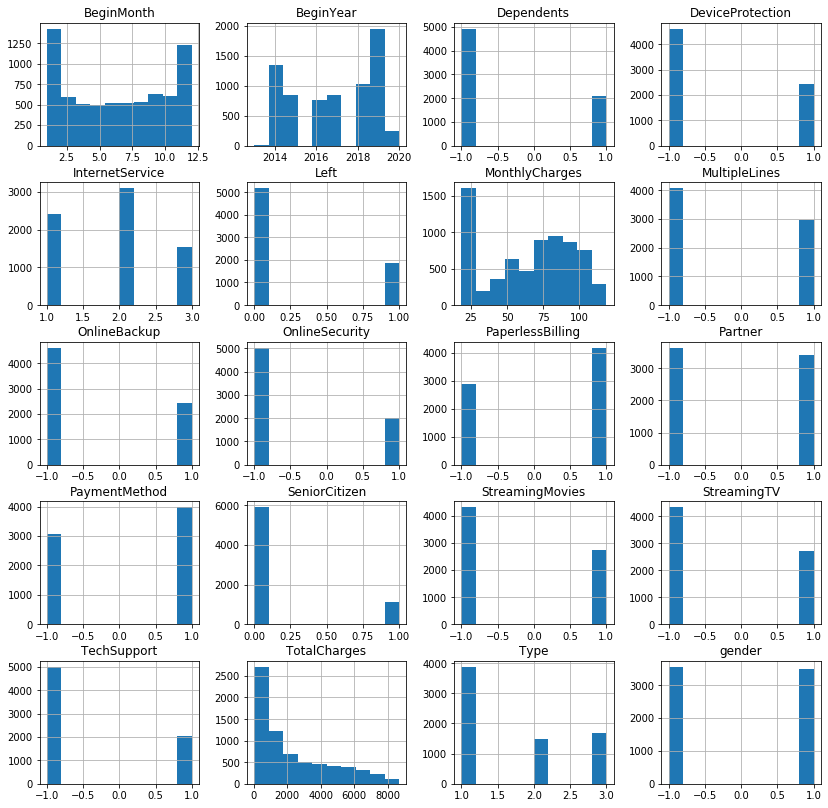

In [62]:
explore_with_graphs(df)

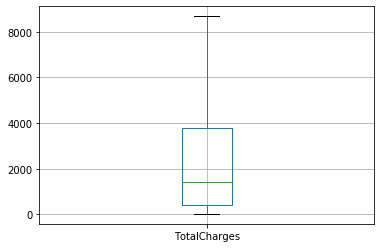

In [16]:
df.boxplot(column='TotalCharges')

#### Graphs Conclusion
1. 2019, last year, there was an increasement in the quantity of new customers.
2. Usually customers join at months January and December (end or the beginning of the year).
3. Most of the services are token by less than half of the customers.
4. The 'gender' and 'Partner' features are mostly equal.
5. The 'TotalCharges' is right-wing sided. The median is lower than the mean, most of the customers pay low prizes.
6. he 'TotalCharges' is right-wing sided. The median is lower than the mean, most of the customers pay low prizes.

## 2.2. Looking for correlations between parameters and the target

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0eec6b910>,
      dtype=object)

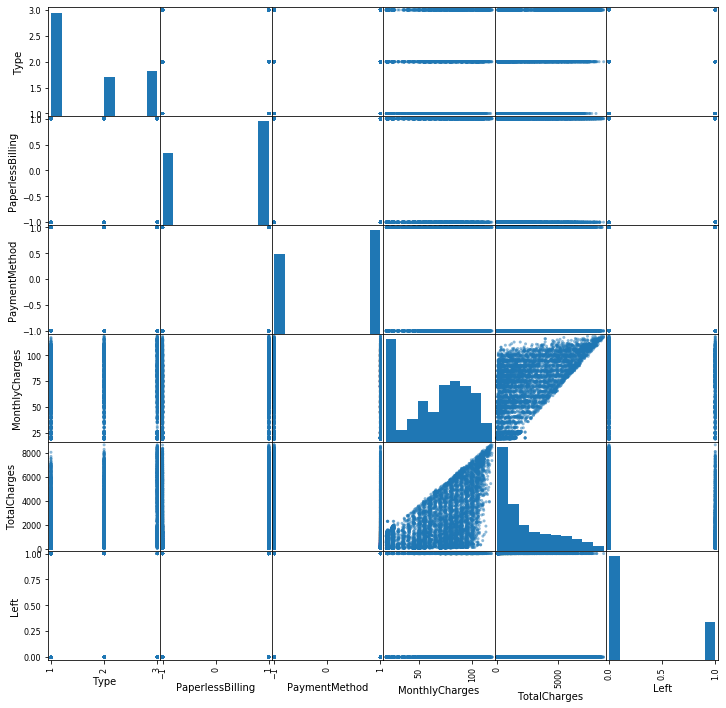

In [17]:
for_plot_1 = df.drop(columns=['customerID','gender','SeniorCitizen',
                              'Partner','Dependents','InternetService','OnlineSecurity',
                              'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                              'StreamingMovies','MultipleLines','BeginYear','BeginMonth'], axis=1)
pd.plotting.scatter_matrix(for_plot_1, figsize=(12, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0ef4db9d0>,
      dtype=object)

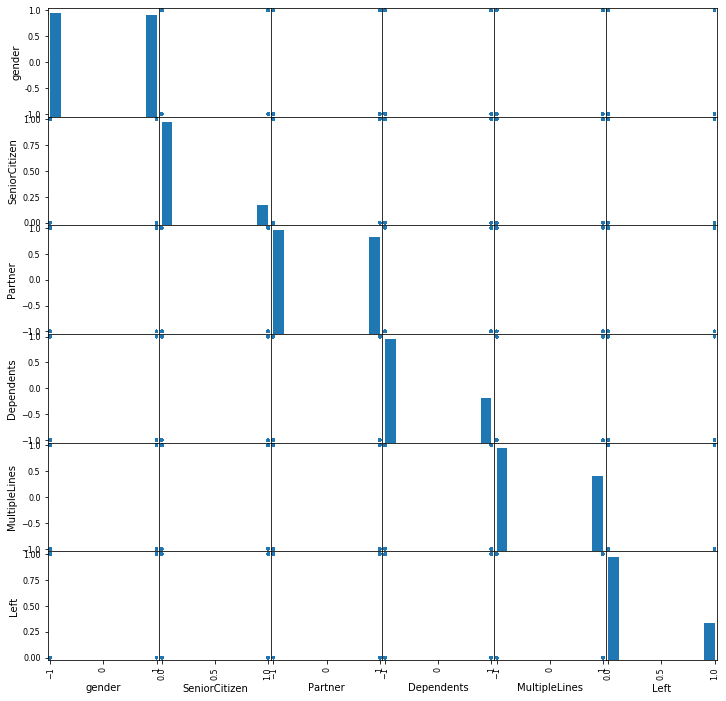

In [18]:
for_plot_2 = df.drop(columns=['customerID','Type','PaperlessBilling','PaymentMethod',
                              'MonthlyCharges','TotalCharges','InternetService','OnlineSecurity',
                              'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                              'StreamingMovies','BeginYear','BeginMonth'], axis=1)
pd.plotting.scatter_matrix(for_plot_2, figsize=(12, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0ef39d990>,
      dtype=object)

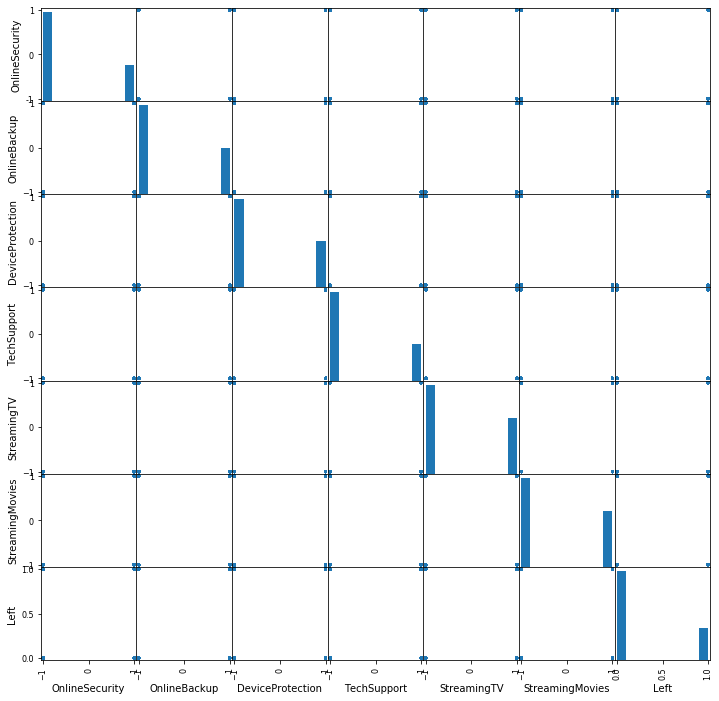

In [19]:
for_plot_3 = df.drop(columns=['customerID','Type','PaperlessBilling','PaymentMethod',
                              'MonthlyCharges','TotalCharges','gender','SeniorCitizen',
                              'Partner','Dependents','InternetService',
                              'MultipleLines','BeginYear','BeginMonth'], axis=1)
pd.plotting.scatter_matrix(for_plot_3, figsize=(12, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0e78eacd0>,
      dtype=object)

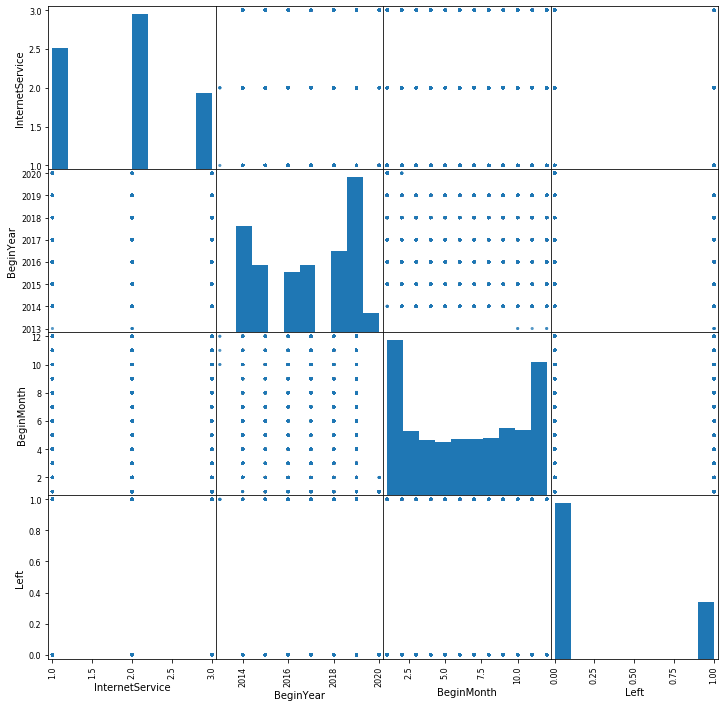

In [20]:
for_plot_4 = df.drop(columns=['customerID','Type','PaperlessBilling','PaymentMethod',
                              'MonthlyCharges','TotalCharges','gender','SeniorCitizen',
                              'Partner','Dependents','OnlineSecurity','OnlineBackup',
                              'DeviceProtection','TechSupport','StreamingTV',
                              'StreamingMovies','MultipleLines'], axis=1)
pd.plotting.scatter_matrix(for_plot_4, figsize=(12, 12))

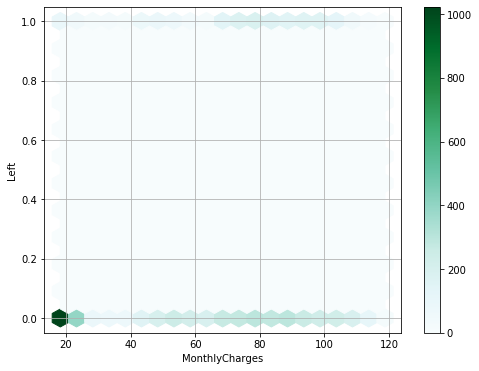

In [21]:
df.plot(x='MonthlyCharges', y='Left', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

### Correlation conclusions
1. There is no one-one correlation with most of the features. We should look for deeper connections.
2. Many people who pay few over the 'MonthlyCharges' and 'TotalCharges' didn't left the company.

## 2.3. Looking for irrelevant columns
Since there are many features, and correlation exploration didn't find any special findings, and entropy doesn't look good for any feature, we will keep all the features, in order to find as many as deep connections between them.

## 2.4. Explore the date-time parameters
Is there a tendence of people joinning and people leaving.

In [95]:
df_num_left = df_copy.groupby(['EndDate']).agg({'Left':'sum'})

In [96]:
df_num_join_year = df_copy.groupby(['BeginYear']).agg({'Left':'sum'})
df_num_join_month = df_copy.groupby(['BeginMonth']).agg({'Left':'sum'})

In [86]:
df_num_left.info()
df_num_left.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2019-10-01 00:00:00 to No
Data columns (total 1 columns):
Left    5 non-null int64
dtypes: int64(1)
memory usage: 80.0+ bytes


,Left
EndDate,
2019-10-01 00:00:00,458
2019-11-01 00:00:00,485
2019-12-01 00:00:00,466
2020-01-01 00:00:00,460
No,0


Average of customers left each month: 467.25


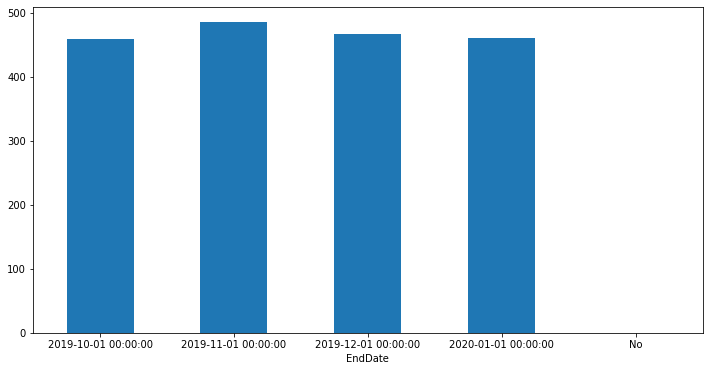

In [93]:
a = (458+485+466+460)/4
print('Average of customers left each month:', a)
df_num_left.plot(kind='bar', rot=0, figsize=(12,6),legend=False)

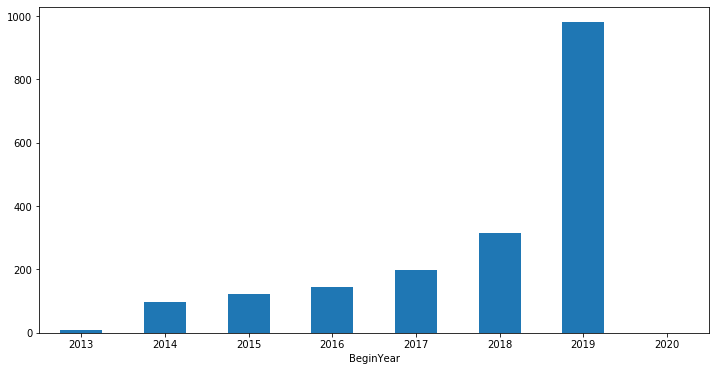

In [97]:
df_num_join_year.plot(kind='bar', rot=0, figsize=(12,6),legend=False)

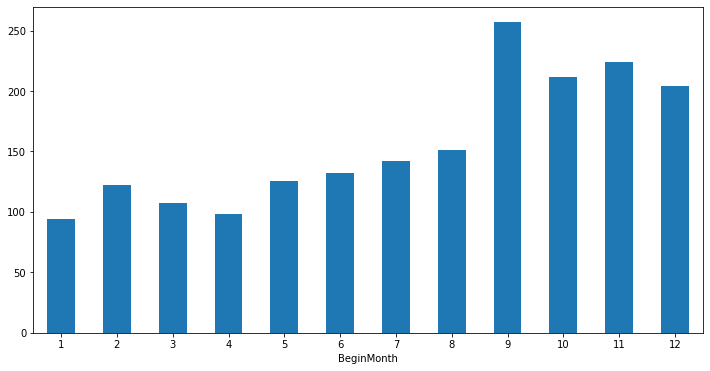

In [98]:
df_num_join_month.plot(kind='bar', rot=0, figsize=(12,6),legend=False)

### Date-time exploration conclusions
1. Only on the last month of 2019 customers started leaving or only since then the company started to manage it.
2. The number of customers who leave each month is quite similar, around 467.
3. There is no trend on customers leaving.
4. There is a trend of customers joining the company through the years.
5. Customers usualy join at the end of the year, but also is the time of the year where customers left the company.

# 3. Clustering exploration
Trying to find any clustering for the data and people who leave.

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

Objective function:
7941243609.00866
Cluster centroids:
[[ 1.48748991e+00  9.28167877e-02  2.91767554e-01  5.36023002e+01
   9.85030197e+02  3.12348668e-01]
 [ 2.17249641e+00  4.02012458e-01 -2.56348826e-01  9.12619070e+01
   5.36630347e+03  1.53809296e-01]]


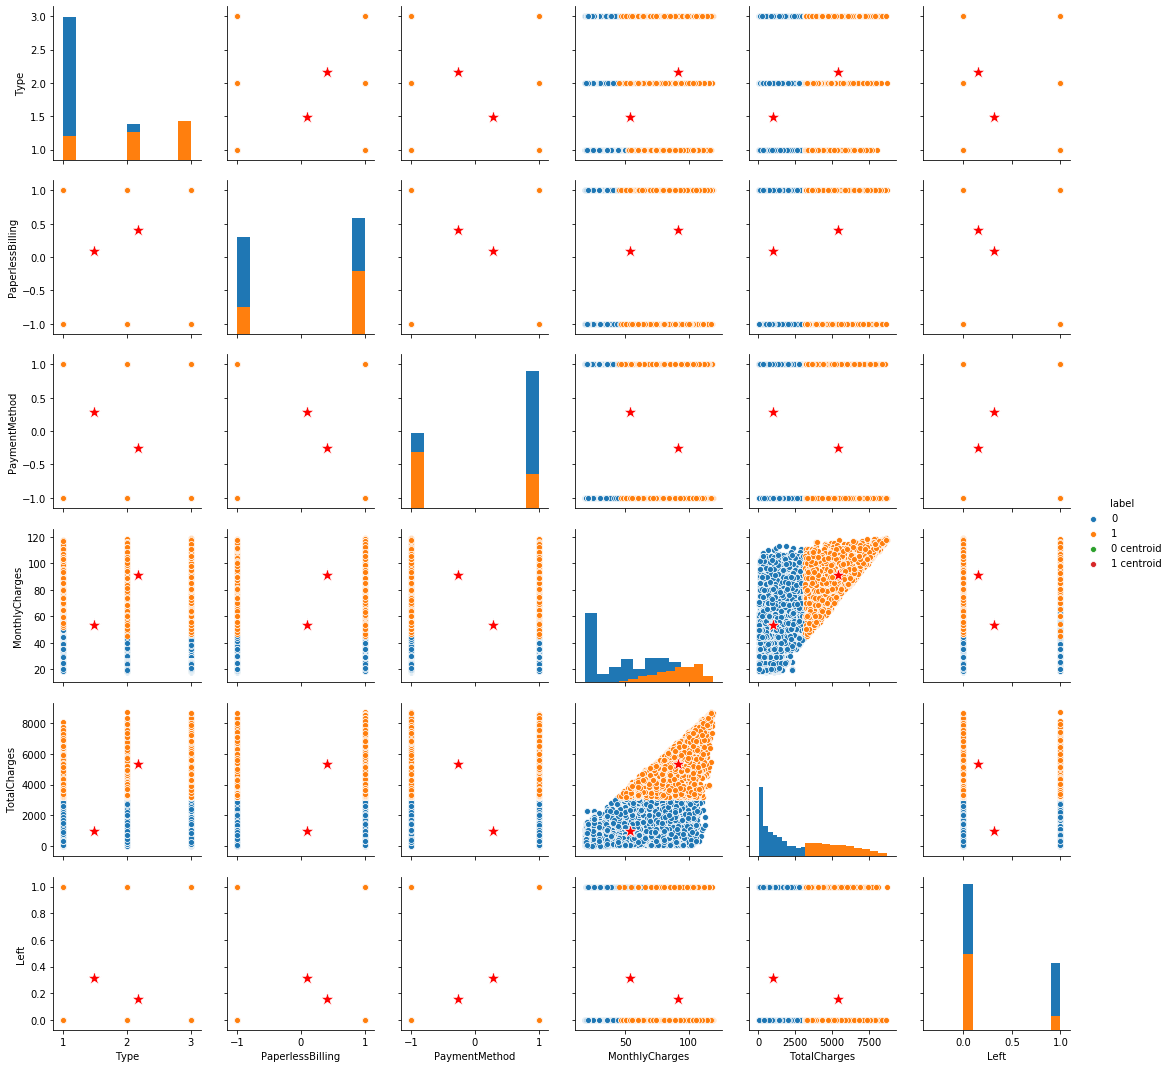

In [54]:
model = KMeans(n_clusters=2, random_state=12345)
model.fit(for_plot_1)
centroids = pd.DataFrame(model.cluster_centers_, columns=for_plot_1.columns)
for_plot_1['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid']

# An index reset is required to create pairgrid.data
data_all = pd.concat([for_plot_1, centroids], ignore_index=True)
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')

# An additional layer for the centroids
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', color='red')
print("Objective function:")
print(model.inertia_)
print("Cluster centroids:")
print(model.cluster_centers_)

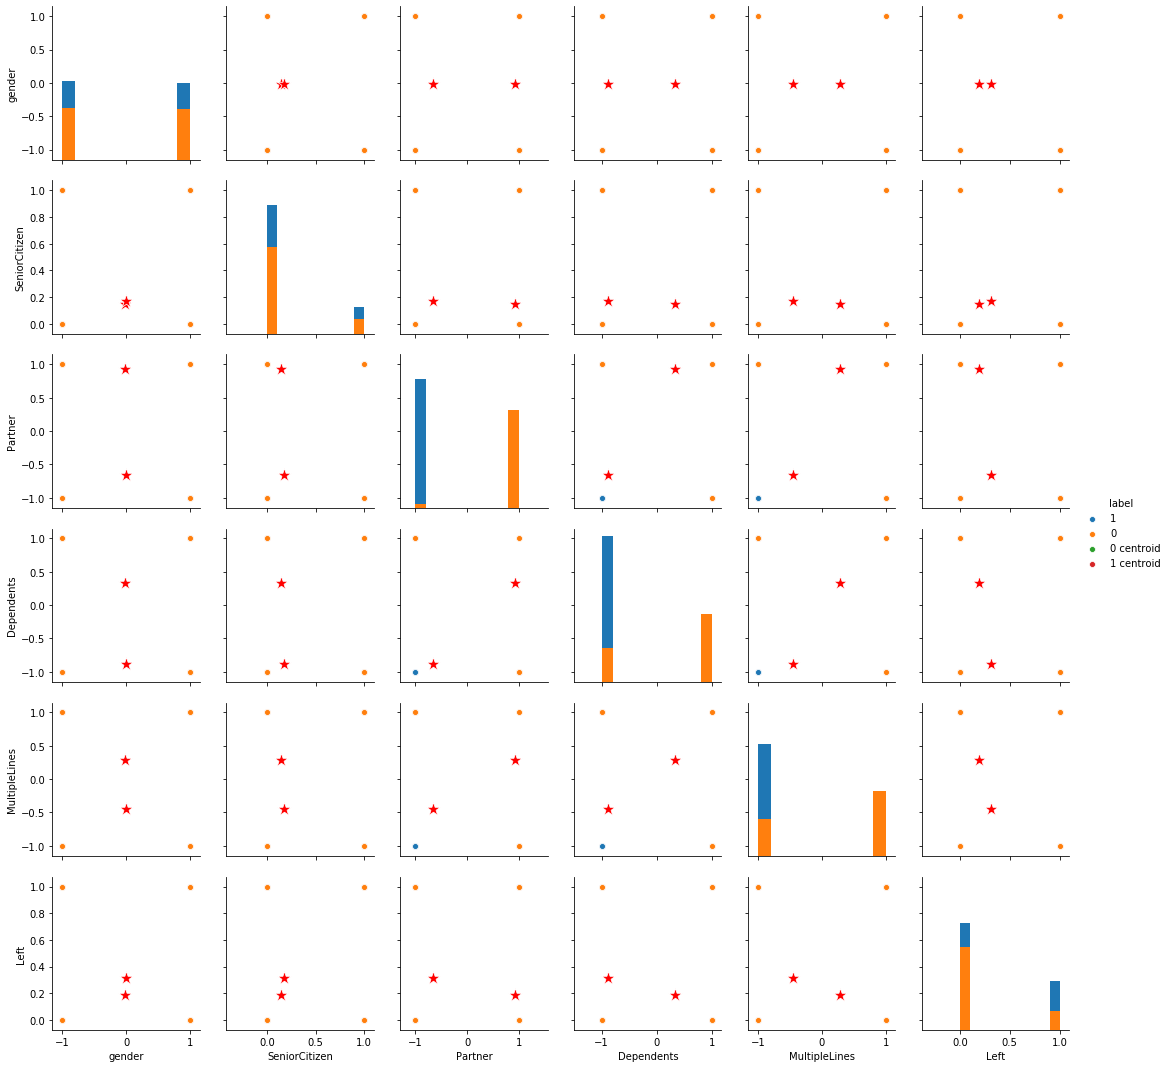

In [55]:
model = KMeans(n_clusters=2, random_state=12345)
model.fit(for_plot_2)
centroids = pd.DataFrame(model.cluster_centers_, columns=for_plot_2.columns)
for_plot_2['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid']

# An index reset is required to create pairgrid.data
data_all = pd.concat([for_plot_2, centroids], ignore_index=True)
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')

# An additional layer for the centroids
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', color='red')

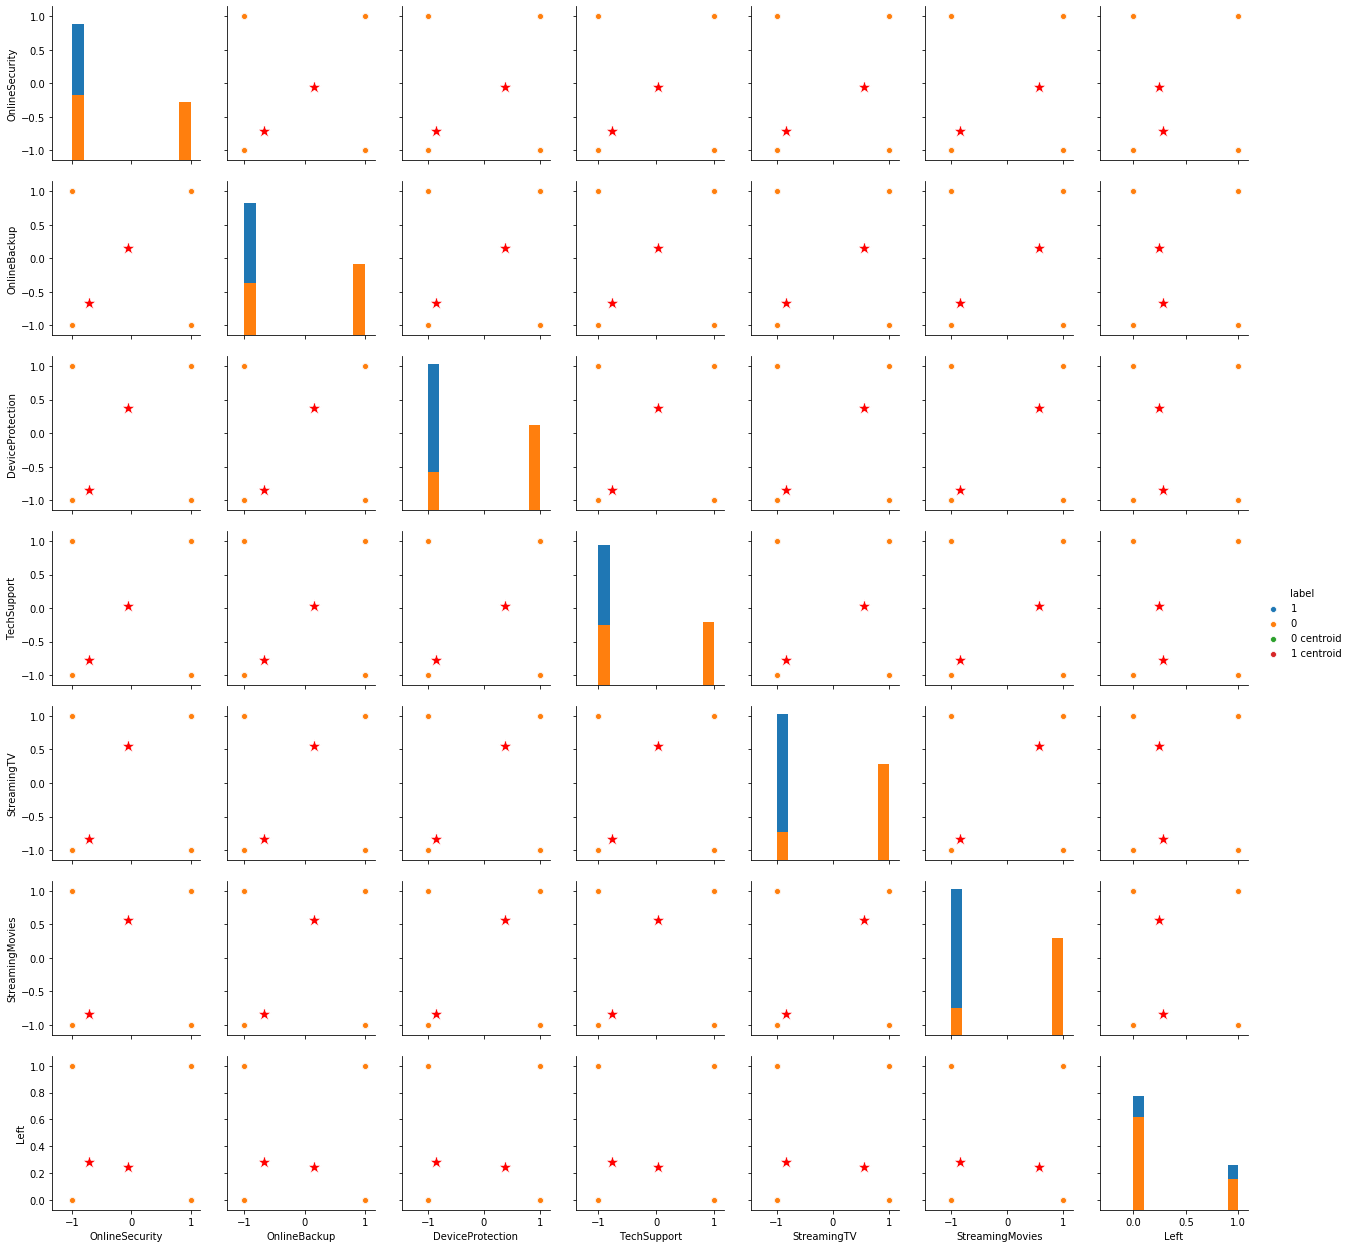

In [26]:
model = KMeans(n_clusters=2, random_state=12345)
model.fit(for_plot_3)
centroids = pd.DataFrame(model.cluster_centers_, columns=for_plot_3.columns)
for_plot_3['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid']

# An index reset is required to create pairgrid.data
data_all = pd.concat([for_plot_3, centroids], ignore_index=True)
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')

# An additional layer for the centroids
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', color='red')

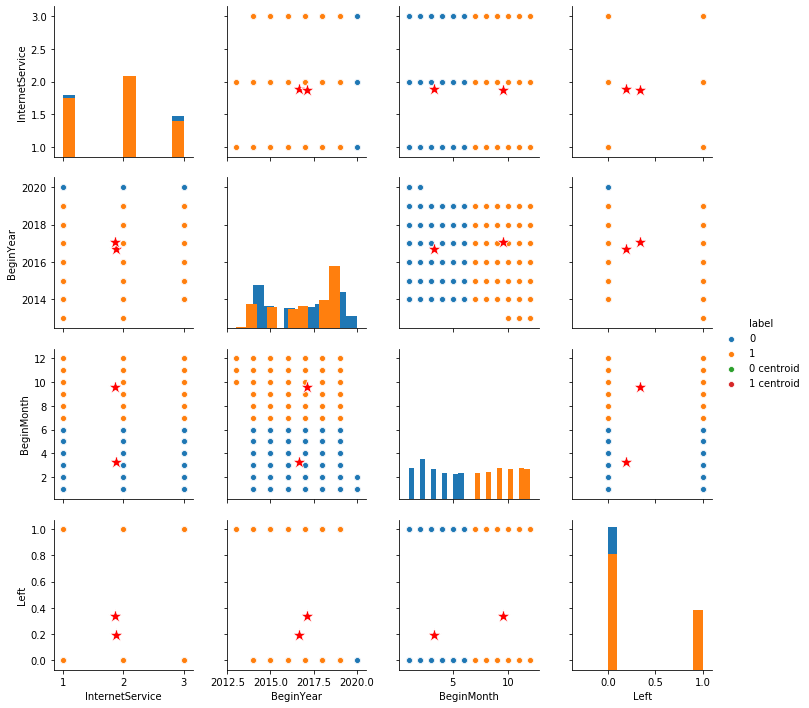

In [27]:
model = KMeans(n_clusters=2, random_state=12345)
model.fit(for_plot_4)
centroids = pd.DataFrame(model.cluster_centers_, columns=for_plot_4.columns)
for_plot_4['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid']

# An index reset is required to create pairgrid.data
data_all = pd.concat([for_plot_4, centroids], ignore_index=True)
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')

# An additional layer for the centroids
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', color='red')

### Clustering conclusions
1. Using clustering did not work, since there is not a way to make our target the objective function.
2. Not any of the groups and correlation we look for, generate a good result to separate the people who left.
3. Probably we need to look for deeper connections between the classes. 

# 4. Training classifier models
## 4.1. Creating graphs and functions to test and compare the models qualities

In [23]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score 
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [24]:
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
        
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc
        
        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return roc_auc

## 4.2. Balancing the data before training
As we found before, the target observation is not balance, while target = 0 (customer stayed) is 74%, and target = 1 (customer left) is 26%. Thus, we are going to multiple the observations of the customers left by 3.

In [25]:
target = df['Left']
features = df.drop(columns=['Left','customerID'], axis=1)

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features, target, 3)

print('features_upsampled',features_upsampled.shape)
print('target_upsampled',target_upsampled.shape)

features_upsampled (10781, 19)
target_upsampled (10781,)


In [26]:
print(target_upsampled.value_counts())
print('The portion of customers who leaft the company:',(10781-5174)/10781)

1    5607
0    5174
Name: Left, dtype: int64
The portion of customers who leaft the company: 0.5200816250811613


## 4.3. Separating the data to training, validation and test

In [27]:
features_1, features_test, target_1, target_test = train_test_split(
    features_upsampled, target_upsampled, test_size=0.25, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

In [28]:
print('features_1',features_1.shape)
print('target_1',target_1.shape)
print('features_train',features_train.shape)
print('target_train',target_train.shape)
print('features_valid',features_valid.shape)
print('target_valid',target_valid.shape)
print('features_test',features_test.shape)
print('target_test',target_test.shape)

features_1 (8085, 19)
target_1 (8085,)
features_train (6063, 19)
target_train (6063,)
features_valid (2022, 19)
target_valid (2022,)
features_test (2696, 19)
target_test (2696,)


## 4.4. Training models, looking for Hyper-Parameters

In [29]:
models = []
models.append(('SVM', SVC(probability=True)))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


          train  test
Accuracy    1.0  0.93
F1          1.0  0.93
APS         1.0  0.98
ROC AUC     1.0  0.97
SVM ROC-AUC score: 0.9707810742165431
Confusion Matrix: [[921  24]
 [119 958]]
--------------------------------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          train  test
Accuracy   0.76  0.76
F1         0.78  0.79
APS        0.83  0.84
ROC AUC    0.84  0.84
LR ROC-AUC score: 0.8404327128561112
Confusion Matrix: [[660 285]
 [196 881]]
--------------------------------------------------------
          train  test
Accuracy   0.84  0.76
F1         0.85  0.78
APS        0.92  0.82
ROC AUC    0.93  0.85
KNN ROC-AUC score: 0.8456416756323906
Confusion Matrix: [[660 285]
 [206 871]]
--------------------------------------------------------
          train  test
Accuracy    1.0  0.89
F1          1.0  0.90
APS         1.0  0.84
ROC AUC     1.0  0.88
CART ROC-AUC score: 0.8847887282427673
Confusion Matrix: [[ 772  173]
 [  51 1026]]
--------------------------------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


          train  test
Accuracy    1.0  0.90
F1          1.0  0.91
APS         1.0  0.95
ROC AUC     1.0  0.96
RF ROC-AUC score: 0.9576591845858327
Confusion Matrix: [[ 812  133]
 [  60 1017]]
--------------------------------------------------------


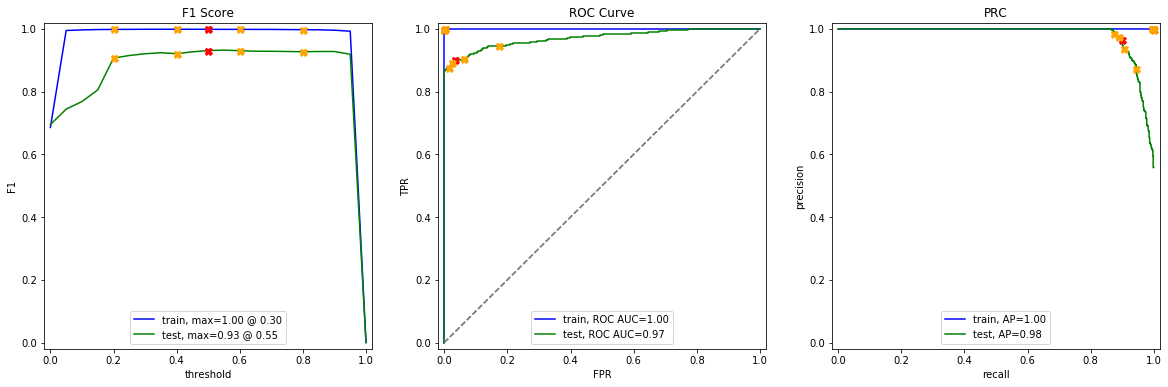

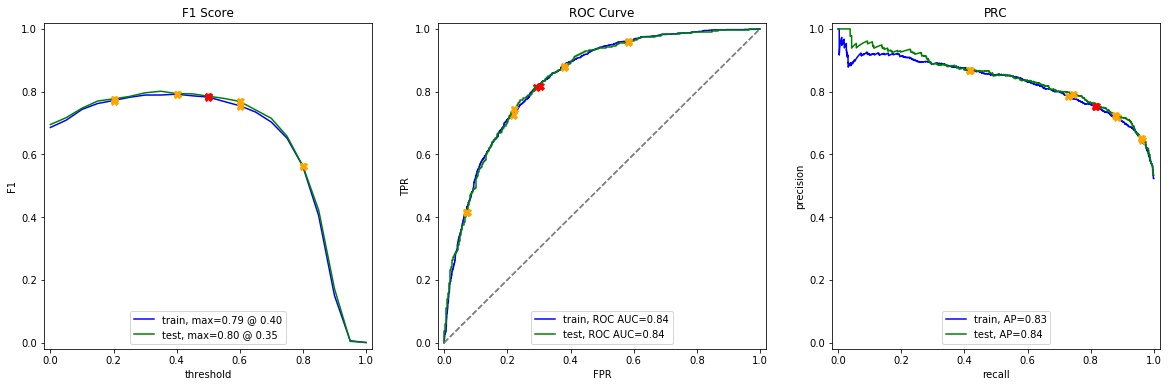

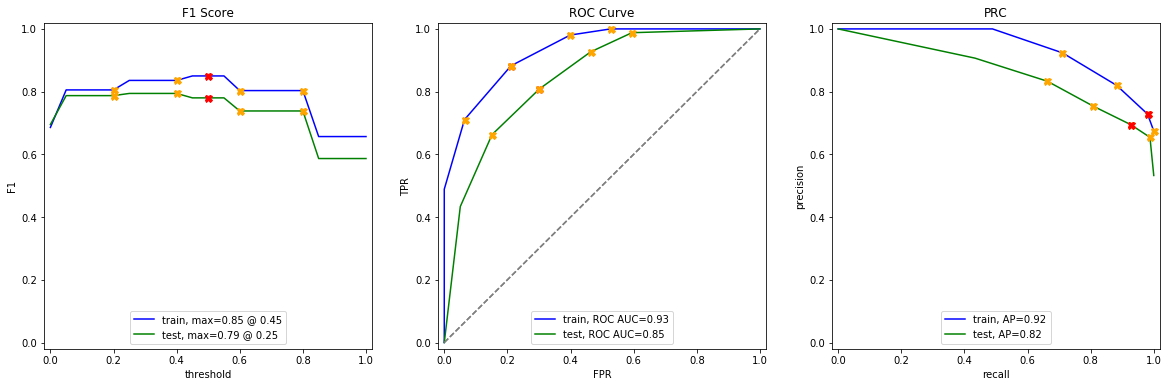

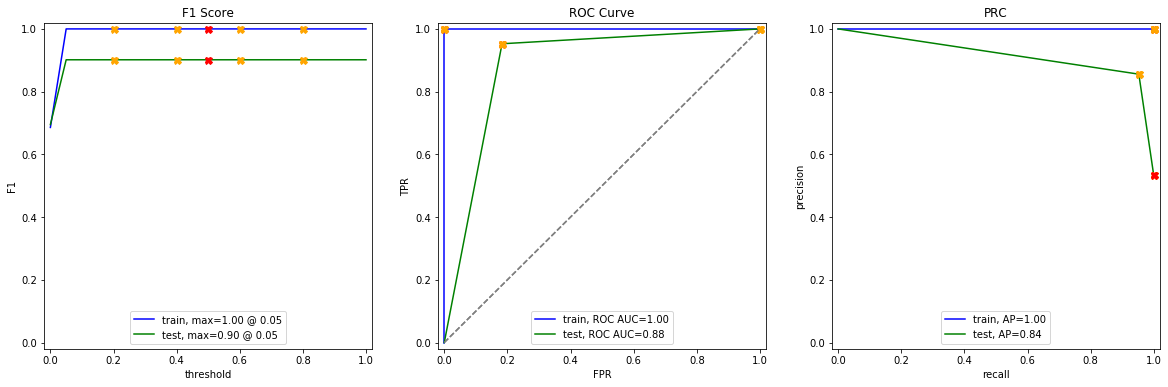

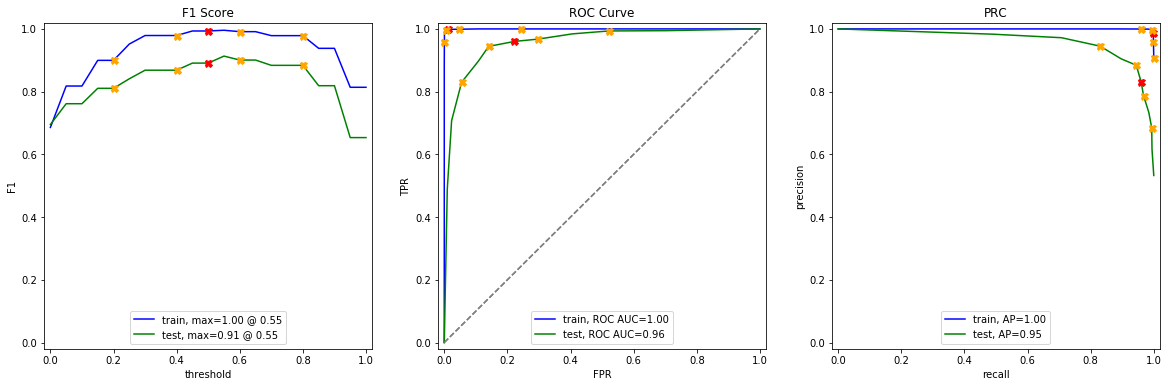

In [30]:
for mod in models:
    name = mod[0]
    model = mod[1]
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    roc_auc = evaluate_model(model, features_train, target_train, features_valid, target_valid)
    print(name,'ROC-AUC score:', roc_auc)
    print("Confusion Matrix:",confusion_matrix(target_valid,predicted_valid))
    print('--------------------------------------------------------')

In [31]:
def parameters_val_score_classifier (model, features_train, target_train, features_valid, target_valid):
    model = model.fit(features_train, target_train)
    pred_target = model.predict(features_valid)
    pred_proba = model.predict_proba(features_valid)[:, 1]
    roc_auc = metrics.roc_auc_score(target_valid, pred_proba)
    return roc_auc

In [35]:
for iter in range(180,261,10):
    model = SVC(max_iter=iter, probability=True, random_state=12345)
    score = parameters_val_score_classifier(model, features_train, target_train, features_valid, target_valid)
    print('Iterations num -', iter, '- ROC-AUC score:', score)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=180).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Iterations num - 180 - ROC-AUC score: 0.7213674079969344


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=190).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Iterations num - 190 - ROC-AUC score: 0.7334158671206025


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Iterations num - 200 - ROC-AUC score: 0.7346568215648994


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=210).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Iterations num - 210 - ROC-AUC score: 0.6940511807735578


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=220).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Iterations num - 220 - ROC-AUC score: 0.7388277254572521


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=230).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Iterations num - 230 - ROC-AUC score: 0.744624741467824


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=240).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Iterations num - 240 - ROC-AUC score: 0.7496131228721757


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Iterations num - 250 - ROC-AUC score: 0.7523524585734428
Iterations num - 260 - ROC-AUC score: 0.7585896547827841


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=260).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [36]:
for iter in range(10,61,10):
    model = LogisticRegression(max_iter=iter, random_state=12345)
    score = parameters_val_score_classifier(model, features_train, target_train, features_valid, target_valid)
    print('Iterations num -', iter, '- ROC-AUC score:', score)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iterations num - 10 - ROC-AUC score: 0.8211168589998673
Iterations num - 20 - ROC-AUC score: 0.8404327128561112


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iterations num - 30 - ROC-AUC score: 0.8404327128561112


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iterations num - 40 - ROC-AUC score: 0.8404327128561112


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iterations num - 50 - ROC-AUC score: 0.8404327128561112
Iterations num - 60 - ROC-AUC score: 0.8404327128561112


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
for neighbors in range(1,10):
    model = KNeighborsClassifier(n_neighbors=neighbors)
    score = parameters_val_score_classifier(model, features_train, target_train, features_valid, target_valid)
    print('Neighbors num -', neighbors, '- ROC-AUC score:', score)

Neighbors num - 1 - ROC-AUC score: 0.8732133645782671
Neighbors num - 2 - ROC-AUC score: 0.8663453744233689
Neighbors num - 3 - ROC-AUC score: 0.8569375052197707
Neighbors num - 4 - ROC-AUC score: 0.8523563887537889
Neighbors num - 5 - ROC-AUC score: 0.8456416756323906
Neighbors num - 6 - ROC-AUC score: 0.8412988263498942
Neighbors num - 7 - ROC-AUC score: 0.8404115881367507
Neighbors num - 8 - ROC-AUC score: 0.8430128762533591
Neighbors num - 9 - ROC-AUC score: 0.8428763024863304


In [38]:
for depth in range(1,10):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    score = parameters_val_score_classifier(model, features_train, target_train, features_valid, target_valid)
    print('Max_Depth -', depth, '- ROC-AUC score:', score)

Max_Depth - 1 - ROC-AUC score: 0.7287512343222649
Max_Depth - 2 - ROC-AUC score: 0.7590539073361728
Max_Depth - 3 - ROC-AUC score: 0.7973019311923677
Max_Depth - 4 - ROC-AUC score: 0.8376132997302914
Max_Depth - 5 - ROC-AUC score: 0.8580556415282506
Max_Depth - 6 - ROC-AUC score: 0.8635451209267365
Max_Depth - 7 - ROC-AUC score: 0.8732290852996518
Max_Depth - 8 - ROC-AUC score: 0.8790256100376804
Max_Depth - 9 - ROC-AUC score: 0.8776539770968741


In [39]:
for estimators in range(1,15):
    model = RandomForestClassifier(n_estimators=estimators, random_state=12345)
    score = parameters_val_score_classifier(model, features_train, target_train, features_valid, target_valid)
    print('Estimators num -', estimators, '- ROC-AUC score:', score)

Estimators num - 1 - ROC-AUC score: 0.8311918763172246
Estimators num - 2 - ROC-AUC score: 0.9009918792648597
Estimators num - 3 - ROC-AUC score: 0.9250077375425564
Estimators num - 4 - ROC-AUC score: 0.9351751140980482
Estimators num - 5 - ROC-AUC score: 0.9438775159295123
Estimators num - 6 - ROC-AUC score: 0.9504114407549876
Estimators num - 7 - ROC-AUC score: 0.9559667506742715
Estimators num - 8 - ROC-AUC score: 0.9572116352989147
Estimators num - 9 - ROC-AUC score: 0.9590598026066921
Estimators num - 10 - ROC-AUC score: 0.9607876081413687
Estimators num - 11 - ROC-AUC score: 0.9623193959312808
Estimators num - 12 - ROC-AUC score: 0.9642992242806543
Estimators num - 13 - ROC-AUC score: 0.9652498366518794
Estimators num - 14 - ROC-AUC score: 0.9661837457566333


In [40]:
def cross_val_score_classifier (features1, target1, model):
    scores = []
    sample_size = int(len(features1)/3)
    for i in range(0, 3, 1):
        valid_indexes = features1.iloc[i:i+sample_size].index
        train_indexes = features1[~(features1.index.isin(valid_indexes))].index
        features_train = features1.iloc[train_indexes]
        features_valid = features1.iloc[valid_indexes]
        target_train = target1.iloc[train_indexes]
        target_valid = target1.iloc[valid_indexes]

        model = model
        model = model.fit(features_train, target_train)
        
        predicted_valid = model.predict(features_valid)
        pred_proba = model.predict_proba(features_valid)[:, 1]

        roc_auc2 = metrics.roc_auc_score(target_valid, pred_proba)
        scores.append(roc_auc2)
    return scores

In [41]:
for mod in models:
    name = mod[0]
    model = mod[1]
    scores = cross_val_score_classifier (features_1, target_1, model)
    final_score = pd.Series(scores).mean()  
    print(name,'Average model ROC-AUC score:', final_score)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Average model ROC-AUC score: 0.8864758343719706


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Average model ROC-AUC score: 0.8361002631214514
KNN Average model ROC-AUC score: 0.8076415085629876
CART Average model ROC-AUC score: 0.8307196602501962
RF Average model ROC-AUC score: 0.9122132668605456


In [46]:
for iter in range(180,261,10):
    model = SVC(max_iter=iter, probability=True, random_state=12345)
    scores = cross_val_score_classifier (features_1, target_1, model)
    final_score = pd.Series(scores).mean()  
    print('Num of iteration -', iter, '- Average model ROC-AUC score:', final_score)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=180).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=180).  Consider pre-processing your data 

Num of iteration - 180 - Average model ROC-AUC score: 0.695138346489406


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=190).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=190).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto

Num of iteration - 190 - Average model ROC-AUC score: 0.7105795134561234


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto

Num of iteration - 200 - Average model ROC-AUC score: 0.7276455707889028


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=210).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=210).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto

Num of iteration - 210 - Average model ROC-AUC score: 0.7337992891104648


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=220).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=220).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto

Num of iteration - 220 - Average model ROC-AUC score: 0.7326063795411532


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=230).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=230).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto

Num of iteration - 230 - Average model ROC-AUC score: 0.7408421732908644


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=240).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=240).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto

Num of iteration - 240 - Average model ROC-AUC score: 0.7440736740063704


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto

Num of iteration - 250 - Average model ROC-AUC score: 0.746901352536583


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=260).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=260).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto

Num of iteration - 260 - Average model ROC-AUC score: 0.7497958731477635


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=260).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [47]:
model = LogisticRegression()
for iter in range(10,121,10):
    model = LogisticRegression(max_iter=iter, random_state=12345)
    scores = cross_val_score_classifier (features_1, target_1, model)
    final_score = pd.Series(scores).mean()  
    print('Num of iteration -', iter, '- Average model ROC-AUC score:', final_score)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWar

Num of iteration - 10 - Average model ROC-AUC score: 0.8197496191663204


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num of iteration - 20 - Average model ROC-AUC score: 0.8361002631214514


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num of iteration - 30 - Average model ROC-AUC score: 0.8361002631214514


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num of iteration - 40 - Average model ROC-AUC score: 0.8361002631214514


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num of iteration - 50 - Average model ROC-AUC score: 0.8361002631214514


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num of iteration - 60 - Average model ROC-AUC score: 0.8361002631214514


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num of iteration - 70 - Average model ROC-AUC score: 0.8361002631214514


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num of iteration - 80 - Average model ROC-AUC score: 0.8361002631214514


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num of iteration - 90 - Average model ROC-AUC score: 0.8361002631214514


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num of iteration - 100 - Average model ROC-AUC score: 0.8361002631214514


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num of iteration - 110 - Average model ROC-AUC score: 0.8361002631214514


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num of iteration - 120 - Average model ROC-AUC score: 0.8361002631214514


In [43]:
for neighbors in range(1,10):
    model = KNeighborsClassifier(n_neighbors=neighbors)
    scores = cross_val_score_classifier (features_1, target_1, model)
    final_score = pd.Series(scores).mean()
    print('Neighbors num -', neighbors, '- Average model ROC-AUC score:', final_score)

Neighbors num - 1 - Average model ROC-AUC score: 0.77931172967733
Neighbors num - 2 - Average model ROC-AUC score: 0.7990577482343166
Neighbors num - 3 - Average model ROC-AUC score: 0.8042426256751142
Neighbors num - 4 - Average model ROC-AUC score: 0.8061719983381804
Neighbors num - 5 - Average model ROC-AUC score: 0.8076415085629876
Neighbors num - 6 - Average model ROC-AUC score: 0.8129997691917094
Neighbors num - 7 - Average model ROC-AUC score: 0.8154900060010156
Neighbors num - 8 - Average model ROC-AUC score: 0.8141815076397544
Neighbors num - 9 - Average model ROC-AUC score: 0.8148901814153163


In [44]:
for depth in range(1,10):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    scores = cross_val_score_classifier (features_1, target_1, model)
    final_score = pd.Series(scores).mean()
    print('Max_Depth -', depth, '- Average model ROC-AUC score:', final_score)

Max_Depth - 1 - Average model ROC-AUC score: 0.7310663343027283
Max_Depth - 2 - Average model ROC-AUC score: 0.7578569911831233
Max_Depth - 3 - Average model ROC-AUC score: 0.7853894659096153
Max_Depth - 4 - Average model ROC-AUC score: 0.8241947098739786
Max_Depth - 5 - Average model ROC-AUC score: 0.8514562156672668
Max_Depth - 6 - Average model ROC-AUC score: 0.8604323500900152
Max_Depth - 7 - Average model ROC-AUC score: 0.8659266029635785
Max_Depth - 8 - Average model ROC-AUC score: 0.8590421455938698
Max_Depth - 9 - Average model ROC-AUC score: 0.8581547338780409


In [45]:
for estimators in range(1,15):
    model = RandomForestClassifier(n_estimators=estimators, random_state=12345)
    scores = cross_val_score_classifier (features_1, target_1, model)
    final_score = pd.Series(scores).mean()  
    print('Estimators num -', estimators, '- Average model ROC-AUC score:', final_score)

Estimators num - 1 - Average model ROC-AUC score: 0.7808826109033836
Estimators num - 2 - Average model ROC-AUC score: 0.837293172690763
Estimators num - 3 - Average model ROC-AUC score: 0.86708452199603
Estimators num - 4 - Average model ROC-AUC score: 0.8847935189031991
Estimators num - 5 - Average model ROC-AUC score: 0.8945350136176892
Estimators num - 6 - Average model ROC-AUC score: 0.9004264413977751
Estimators num - 7 - Average model ROC-AUC score: 0.9038940128329408
Estimators num - 8 - Average model ROC-AUC score: 0.9069067996122421
Estimators num - 9 - Average model ROC-AUC score: 0.9092807090430689
Estimators num - 10 - Average model ROC-AUC score: 0.911822646909477
Estimators num - 11 - Average model ROC-AUC score: 0.9127311083414117
Estimators num - 12 - Average model ROC-AUC score: 0.9136088261090339
Estimators num - 13 - Average model ROC-AUC score: 0.915394359045377
Estimators num - 14 - Average model ROC-AUC score: 0.9172376863776946


## 4.5. Comparing the models
1. Somehow, cross-validation showed lower reults than the normal runs.
3. All models showed nice results at cross-validation, over 81% of ROC-AUC score.
3. All models showed nice results for the normal run, over 84% of ROC-AUC score.
4. The RandomForest Classifier showed the best results for the regressors. Estimators num - 15 - ROC-AUC score: 96%. For cross-validation the result of ROC-AUC score was 91%. We will choose this num of estimators to although it may lead to overfitting.
5. The best model is SVM, with 97% of success.

## 4.6. Choosing the best model
Run it over the test-rows

In [52]:
final_models = []
final_models.append(('SVM', SVC(probability=True, random_state=12345)))
final_models.append(('LR', LogisticRegression(max_iter=30, random_state=12345)))
final_models.append(('KNN', KNeighborsClassifier(n_neighbors=7)))
final_models.append(('CART', DecisionTreeClassifier(max_depth=7)))
final_models.append(('RF', RandomForestClassifier(n_estimators=15)))

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


          train  test
Accuracy    1.0  0.97
F1          1.0  0.97
APS         1.0  0.99
ROC AUC     1.0  0.99
SVM ROC-AUC score: 0.9895551470183512
Confusion Matrix: [[1306   24]
 [  55 1311]]
--------------------------------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          train  test
Accuracy   0.76  0.76
F1         0.78  0.77
APS        0.83  0.82
ROC AUC    0.84  0.84
LR ROC-AUC score: 0.835692268739198
Confusion Matrix: [[ 930  400]
 [ 258 1108]]
--------------------------------------------------------
          train  test
Accuracy   0.82  0.79
F1         0.83  0.80
APS        0.91  0.84
ROC AUC    0.92  0.86
KNN ROC-AUC score: 0.8640113277336827
Confusion Matrix: [[ 974  356]
 [ 218 1148]]
--------------------------------------------------------
          train  test
Accuracy   0.81  0.78
F1         0.83  0.80
APS        0.89  0.87
ROC AUC    0.90  0.88
CART ROC-AUC score: 0.8790483712942678
Confusion Matrix: [[ 917  413]
 [ 171 1195]]
--------------------------------------------------------
          train  test
Accuracy    1.0  0.91
F1          1.0  0.92
APS         1.0  0.98
ROC AUC     1.0  0.99
RF ROC-AUC score: 0.9851707416418058
Confusion Matrix: [[1118  212]
 [  26 1340]]
--------------------------------------------------------


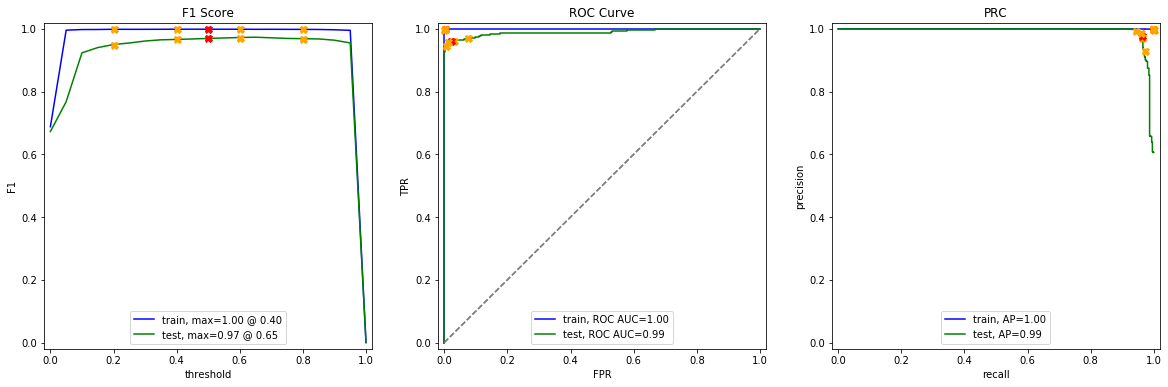

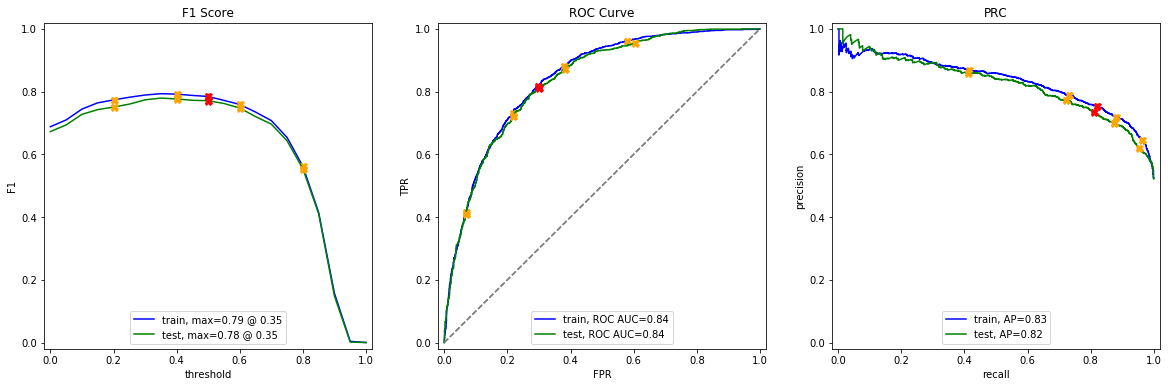

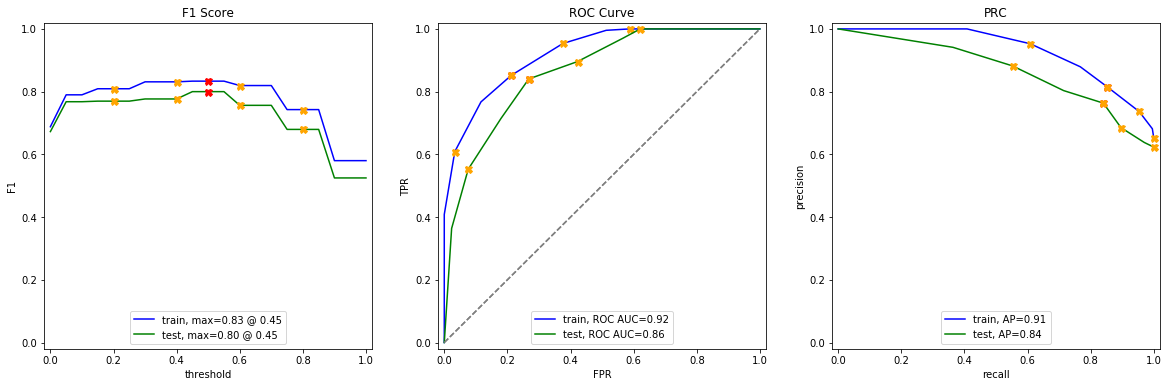

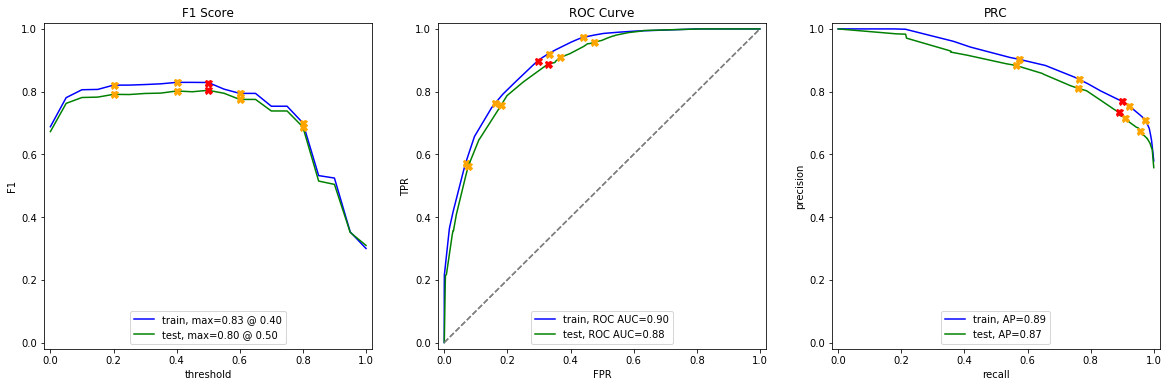

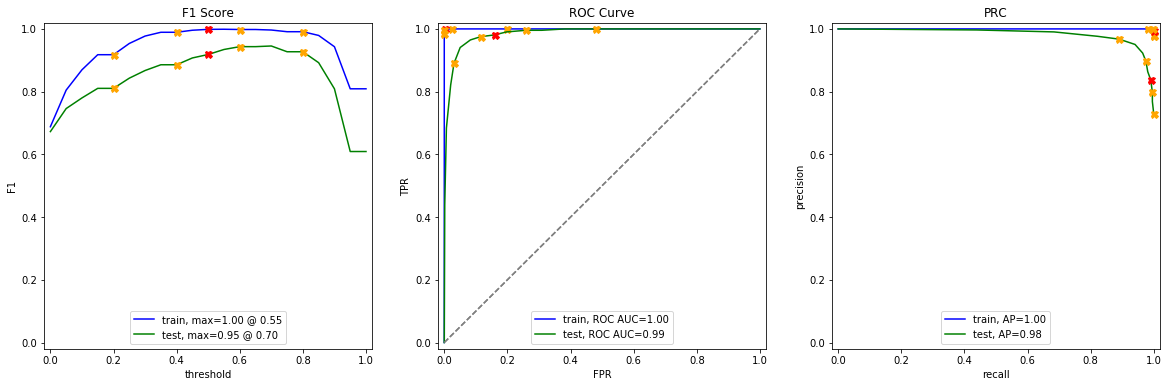

In [53]:
for mod in final_models:
    name = mod[0]
    model = mod[1]
    model.fit(features_1, target_1)
    predicted_test = model.predict(features_test)
    roc_auc = evaluate_model(model, features_1, target_1, features_test, target_test)
    print(name,'ROC-AUC score:', roc_auc)
    print("Confusion Matrix:",confusion_matrix(target_test,predicted_test))
    print('--------------------------------------------------------')

# Final Conclusions
1. All of the models achieved atleast 84% of ROC-AUC score.
2. The best model are SVM and Random Forest Classifier, with 99% ROC-AUC score.
3. We can see that both models mentioned aboved, had an overfitting training model, getting to a score of 100% but after it decreasing a bit.
4. Although both models achieved a 99% ROC-AUC score, SVM have better accuracy and F1 score.
5. Also the number of False Positive is significant lower at the SVM. The False Negative amount is almost the same. Since the False Negative amount is more important (we are looking for those customers who left the company and don't want to miss them before living), both models can be good for us.
6. The Random Forest Classifier runs a bit faster than the SVM, but not significantly. If there are millions of observation maybe time should be considered. Yet, both ran very fast on the data, over 19 features.
7. Best model is to be choose between:
    - SVM with no max_depth, and all parameters as default but 'probability=True'.
    - Random Forest Classifier with 'n_estimators=15'.